<a href="https://colab.research.google.com/github/NahidurRahaman/Python_Note_Book/blob/main/panda_day_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [4]:
left = pd.DataFrame({"key": ["fool","fool"], "lval":[1,2]})
right = pd.DataFrame({"key": ["fool","fool"], "rval":[4,5]})
left

,key,lval
0,fool,1
1,fool,2


In [5]:
right

,key,rval
0,fool,4
1,fool,5


In [6]:
pd.merge(left, right, on="key")

,key,lval,rval
0,fool,1,4
1,fool,1,5
2,fool,2,4
3,fool,2,5


In [7]:
pd.merge(left, right, on="key", how="outer")

,key,lval,rval
0,fool,1,4
1,fool,1,5
2,fool,2,4
3,fool,2,5


In [8]:
pd.merge(left, right)

,key,lval,rval
0,fool,1,4
1,fool,1,5
2,fool,2,4
3,fool,2,5


In [9]:
df = pd.DataFrame({
    "A": ["a","b","a","a","b","c"],
    "B": ["a","b","a","a","b","c"],
    "C": ["a","b","a","a","b","c"],
    "D":np.random.randn(6),
    "E":np.random.randn(6)
    })
df

,A,B,C,D,E
0,a,a,a,-0.192001,-0.928857
1,b,b,b,-0.206661,-0.331375
2,a,a,a,0.911278,-1.072842
3,a,a,a,-0.048958,0.599372
4,b,b,b,0.605456,-0.136050
5,c,c,c,1.517018,0.999755


In [12]:
df.groupby("A").sum()

,B,C,D,E
A,,,,
a,aaa,aaa,0.670319,-1.402326
b,bb,bb,0.398795,-0.467426
c,c,c,1.517018,0.999755


In [15]:
df.groupby(["A","B"]).sum()

,,C,D,E
A,B,,,
a,a,aaa,0.670319,-1.402326
b,b,bb,0.398795,-0.467426
c,c,c,1.517018,0.999755


# Create a list of tuples using zip and unpacking

In [16]:
tuples = list(zip(*[
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"]
]))

# Create a MultiIndex from the tuples, with named levels

In [17]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

# Create a DataFrame with 8 rows and 2 columns, using the MultiIndex

In [18]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

In [19]:
df2 = df[:4]

In [20]:
df2

A         B
first second                    
bar   one     1.135009 -0.875698
      two    -1.680109 -1.143256
baz   one     1.390238 -0.754149
      two    -1.329249 -0.537115

In [21]:
df

A         B
first second                    
bar   one     1.135009 -0.875698
      two    -1.680109 -1.143256
baz   one     1.390238 -0.754149
      two    -1.329249 -0.537115
foo   one    -1.404004  1.043028
      two     0.245165  0.149928
qux   one     0.864059 -1.461538
      two    -0.885198  0.050073

In [22]:
stacked = df2.stack()

In [23]:
stacked

first  second   
bar    one     A    1.135009
               B   -0.875698
       two     A   -1.680109
               B   -1.143256
baz    one     A    1.390238
               B   -0.754149
       two     A   -1.329249
               B   -0.537115
dtype: float64

In [24]:
stacked.unstack()

A         B
first second                    
bar   one     1.135009 -0.875698
      two    -1.680109 -1.143256
baz   one     1.390238 -0.754149
      two    -1.329249 -0.537115

In [25]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.135009 -1.680109
      B -0.875698 -1.143256
baz   A  1.390238 -1.329249
      B -0.754149 -0.537115

In [26]:
stacked.unstack(0)


first          bar       baz
second                      
one    A  1.135009  1.390238
       B -0.875698 -0.754149
two    A -1.680109 -1.329249
       B -1.143256 -0.537115

In [27]:
df = pd.DataFrame({
    "A": ["one", "one", "two", "three"] * 3,
    "B": ["A","B","C"] * 4,
    "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
    "D": np.random.randn(12),
    "E": np.random.randn(12)
})
df

,A,B,C,D,E
0,one,A,foo,1.399314,-0.708251
1,one,B,foo,0.010366,-0.429909
2,two,C,foo,-0.075054,1.083262
3,three,A,bar,-0.258129,0.057342
4,one,B,bar,-0.997072,-1.626584
5,one,C,bar,0.040127,-0.392288
6,two,A,foo,0.732014,0.890135
7,three,B,foo,0.964579,-0.654015
8,one,C,foo,-0.367413,-1.848126
9,one,A,bar,0.514321,-1.528747


In [28]:
pd.pivot_table(df, values="D", index=["A","B"], columns=["C"])

C             bar       foo
A     B                    
one   A  0.514321  1.399314
      B -0.997072  0.010366
      C  0.040127 -0.367413
three A -0.258129       NaN
      B       NaN  0.964579
      C  0.286384       NaN
two   A       NaN  0.732014
      B  1.050249       NaN
      C       NaN -0.075054

In [29]:
df = pd.DataFrame({"id":[1,2,3,4,5,6],"Row_grade":["A","B","C","A","B","C"]})
df

,id,Row_grade
0,1,A
1,2,B
2,3,C
3,4,A
4,5,B
5,6,C


In [32]:
df["grade"] = df["Row_grade"].astype("category")
df

,id,Row_grade,grade
0,1,A,A
1,2,B,B
2,3,C,C
3,4,A,A
4,5,B,B
5,6,C,C


In [35]:
df["grade"] = df["grade"].cat.rename_categories(["very good","good","very bad"])

In [36]:
df

,id,Row_grade,grade
0,1,A,very good
1,2,B,good
2,3,C,very bad
3,4,A,very good
4,5,B,good
5,6,C,very bad


In [37]:
df['grade'] = df['grade'].cat.set_categories(["very bad","bad","medium","good","very good"])

In [38]:
df

,id,Row_grade,grade
0,1,A,very good
1,2,B,good
2,3,C,very bad
3,4,A,very good
4,5,B,good
5,6,C,very bad


In [39]:
df.sort_values(by="grade")

,id,Row_grade,grade
2,3,C,very bad
5,6,C,very bad
1,2,B,good
4,5,B,good
0,1,A,very good
3,4,A,very good


In [40]:
df.groupby("grade").size()

<ipython-input-40-586392de31f1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("grade").size()


,0
grade,
very bad,2
bad,0
medium,0
good,2
very good,2


In [42]:
import matplotlib.pyplot as plt
plt.close("all")

<Axes: >

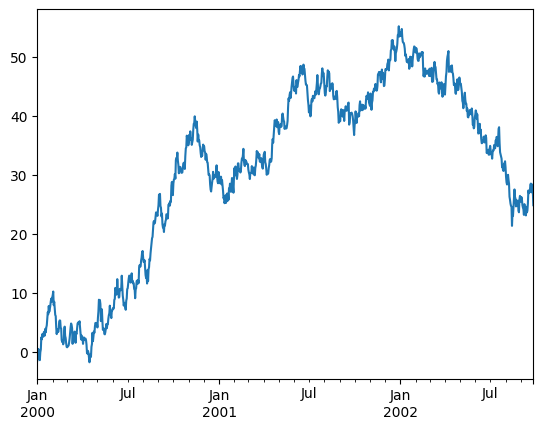

In [43]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 640x480 with 0 Axes>

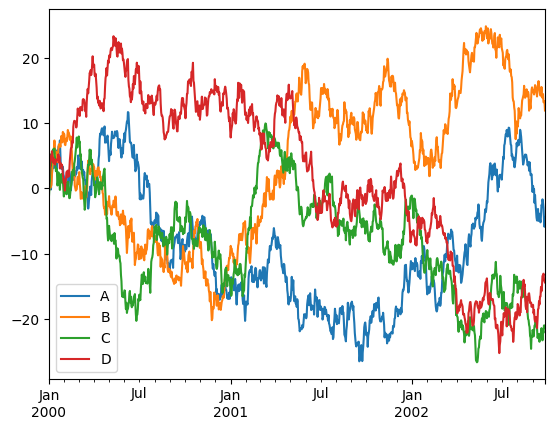

In [44]:
df = pd.DataFrame(np.random.randn(1000,4), index=ts.index, columns=["A","B","C","D"])
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc="best")